# Summary Statistics 
CS 3310 | Muftuler Lab Project 1

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

### Spine data excel 

In [2]:
spine_data = pd.read_excel('../spine/Spine_data.xlsx') # local path
spine_data = spine_data.rename(columns={'T2disc/\nT2CSF': 'T2disc/T2CSF', 'mean ADC' : 'mean_ADC'})
spine_data.head()

Subject number       DHI Pfirrman_degeneration_score  T2disc/T2CSF  \
0            102  0.231342                           4      0.132524   
1            102  0.288821                           4      0.155929   
2            102  0.323729                           5      0.131062   
3            102  0.434992                           2      0.257687   
4            102  0.268585                           5      0.073001   

    mean_ADC  
0   991.3667  
1  1149.3228  
2  1157.8242  
3  1548.2027  
4   664.6954

In [3]:
spine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Subject number               340 non-null    object 
 1   DHI                          340 non-null    float64
 2   Pfirrman_degeneration_score  329 non-null    object 
 3   T2disc/T2CSF                 335 non-null    float64
 4   mean_ADC                     323 non-null    float64
dtypes: float64(3), object(2)
memory usage: 13.4+ KB


In [4]:
spine_data.describe()

DHI  T2disc/T2CSF     mean_ADC
count  340.000000    335.000000   323.000000
mean     0.350523      0.215297  1458.148263
std      0.073528      0.064846   260.104781
min      0.115379      0.073001   498.287100
25%      0.301571      0.163819  1320.856750
50%      0.348080      0.220276  1473.869600
75%      0.404837      0.263694  1611.733700
max      0.534769      0.375285  2114.953800

Text(0, 0.5, 'Number of Discs')

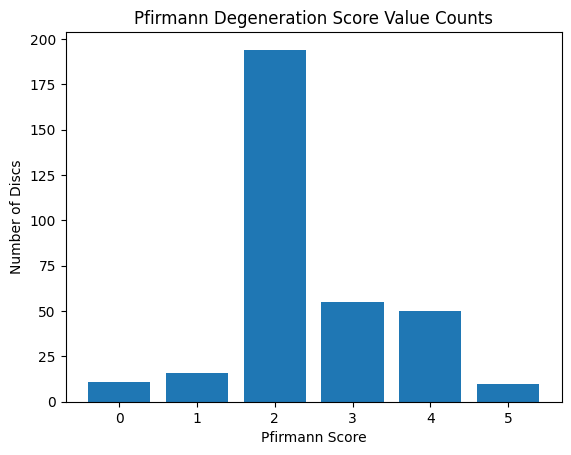

In [5]:
spine_df = spine_data.fillna('0')
spine_df = spine_df.apply(pd.to_numeric, errors='coerce')
pfir_val_count = spine_df['Pfirrman_degeneration_score'].value_counts()
plt.bar(pfir_val_count.index, pfir_val_count)
plt.title('Pfirmann Degeneration Score Value Counts')
plt.xlabel('Pfirmann Score')
plt.ylabel('Number of Discs')
# plt.show()

Text(0.5, 0, 'Disc Height Index')

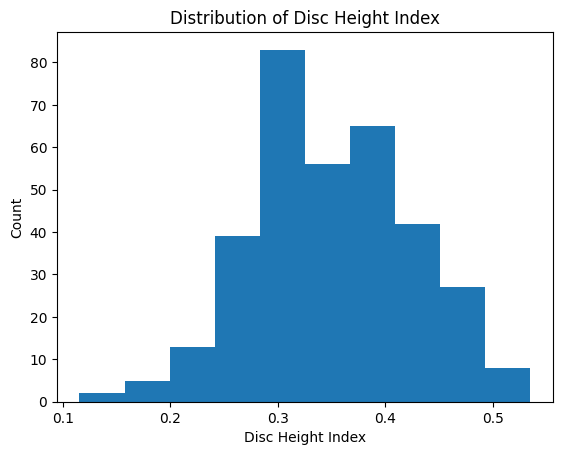

In [6]:
plt.hist(spine_data['DHI'])
plt.title('Distribution of Disc Height Index')
plt.ylabel('Count')
plt.xlabel('Disc Height Index')

In [7]:
spine_df.describe()

Subject number         DHI  Pfirrman_degeneration_score  T2disc/T2CSF  \
count      330.000000  340.000000                   336.000000    340.000000   
mean       236.742424    0.350523                     2.437500      0.212131   
std         40.594859    0.073528                     1.008453      0.069402   
min        102.000000    0.115379                     0.000000      0.000000   
25%        216.000000    0.301571                     2.000000      0.160742   
50%        236.500000    0.348080                     2.000000      0.217253   
75%        265.000000    0.404837                     3.000000      0.263017   
max        299.000000    0.534769                     5.000000      0.375285   

          mean_ADC  
count   340.000000  
mean   1385.240850  
std     406.883324  
min       0.000000  
25%    1272.175275  
50%    1452.657900  
75%    1600.875700  
max    2114.953800

In [8]:
spine_df.drop(columns=['T2disc/T2CSF', 'mean_ADC', 'Subject number']).describe()

DHI  Pfirrman_degeneration_score
count  340.000000                   336.000000
mean     0.350523                     2.437500
std      0.073528                     1.008453
min      0.115379                     0.000000
25%      0.301571                     2.000000
50%      0.348080                     2.000000
75%      0.404837                     3.000000
max      0.534769                     5.000000

### Modic changes excel 

In [9]:
modic_data = pd.read_excel('../spine/Modic_changes.xlsx')
modic_data.head()

Subject number vertebra Modic R1  Modic R2   Modic R3  Modic  hemangioma  \
0             200       L1        1S         1       NaN  1S/1/         NaN   
1             200       L2       NaN         1       NaN    /1/         NaN   
2             200       L3       NaN         1       NaN    /1/         NaN   
3             200       L4       NaN         1       NaN    /1/         NaN   
4             200       L5       NaN       NaN       NaN     //         NaN   

   schmorls node  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

In [10]:
modic_df = modic_data.apply(pd.to_numeric, errors='coerce').fillna('0')
modic_r1_val_counts = modic_df["Modic R1 "].value_counts()
modic_r2_val_counts = modic_df['Modic R2 '].value_counts()
modic_r3_val_counts = modic_df["Modic R3"].value_counts()

In [11]:
modic_df[['Modic R1 ', 'Modic R2 ', 'Modic R3']].describe()

Modic R1  Modic R2  Modic R3
count        410       410      410
unique         3         4        3
top            0         0        0
freq         400       387      383

In [12]:
modic_df['Modic R1 '] = modic_df['Modic R1 '].astype('int')
modic_df['Modic R2 '] = modic_df['Modic R2 '].astype('int')
modic_df['Modic R3'] = modic_df['Modic R3'].astype('int')
modic_df[['Modic R1 ', 'Modic R2 ', 'Modic R3']].describe()

Modic R1    Modic R2     Modic R3
count  410.000000  410.000000  410.000000
mean     0.036585    0.080488    0.102439
std      0.244505    0.371161    0.406841
min      0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000
50%      0.000000    0.000000    0.000000
75%      0.000000    0.000000    0.000000
max      2.000000    4.000000    2.000000

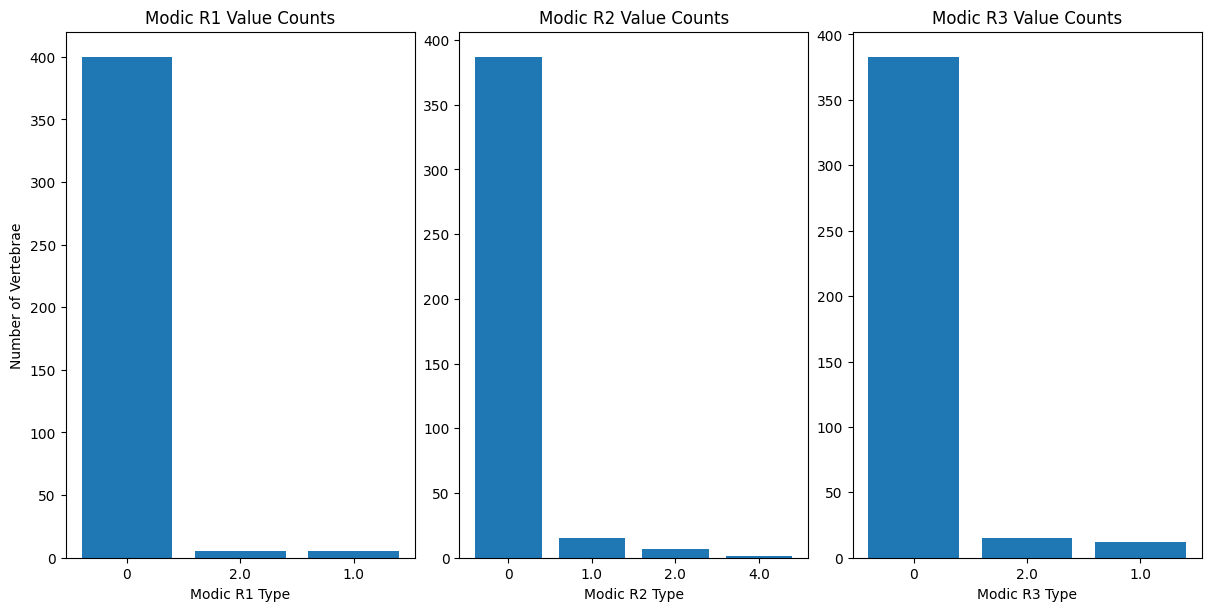

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(12,6))

ax[0].bar(modic_r1_val_counts.index.astype('str'), modic_r1_val_counts)
ax[0].set_title('Modic R1 Value Counts')
ax[0].set_xlabel('Modic R1 Type')
ax[0].set_ylabel('Number of Vertebrae')

ax[1].bar(modic_r2_val_counts.index.astype('str'), modic_r2_val_counts)
ax[1].set_title('Modic R2 Value Counts')
ax[1].set_xlabel('Modic R2 Type')

ax[2].bar(modic_r3_val_counts.index.astype('str'), modic_r3_val_counts)
ax[2].set_title('Modic R3 Value Counts')
ax[2].set_xlabel('Modic R3 Type')

plt.show()

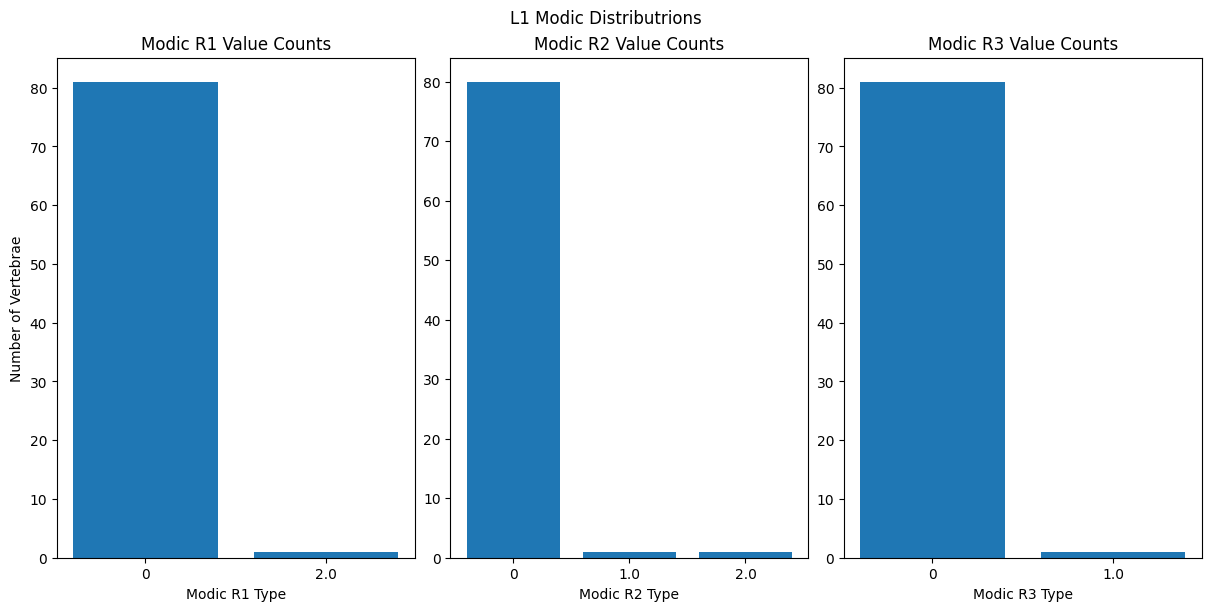

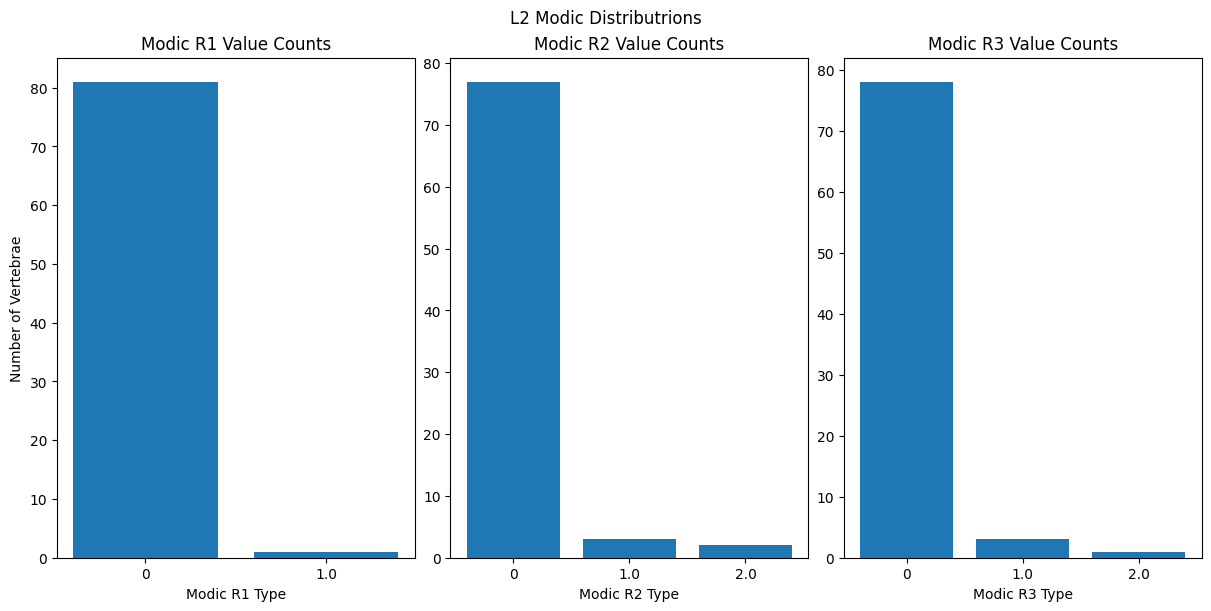

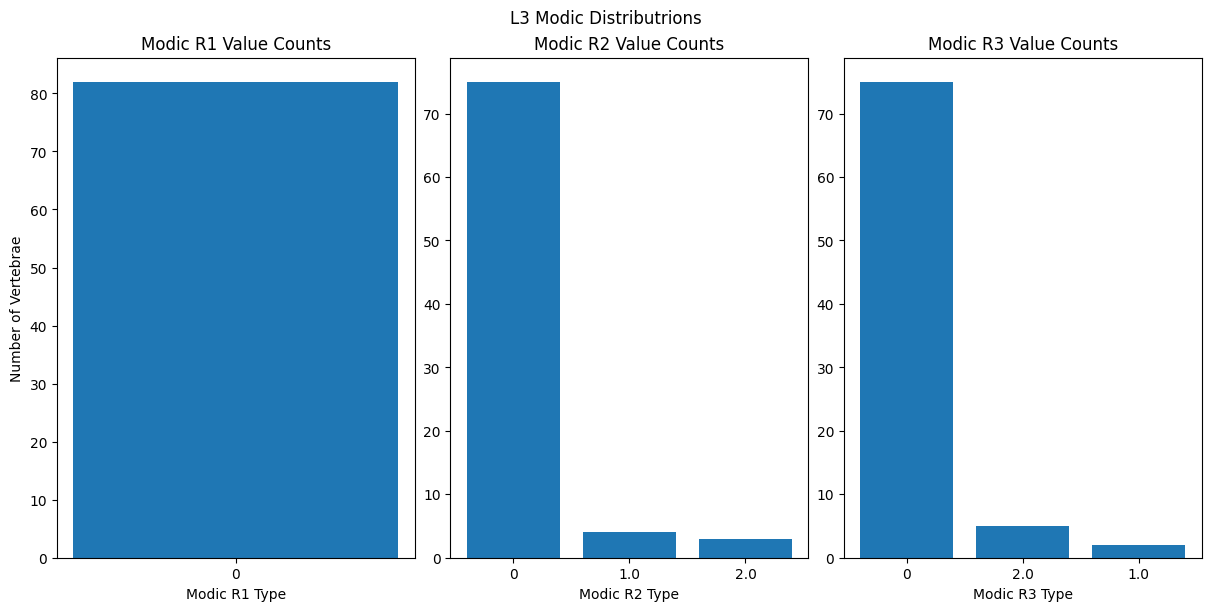

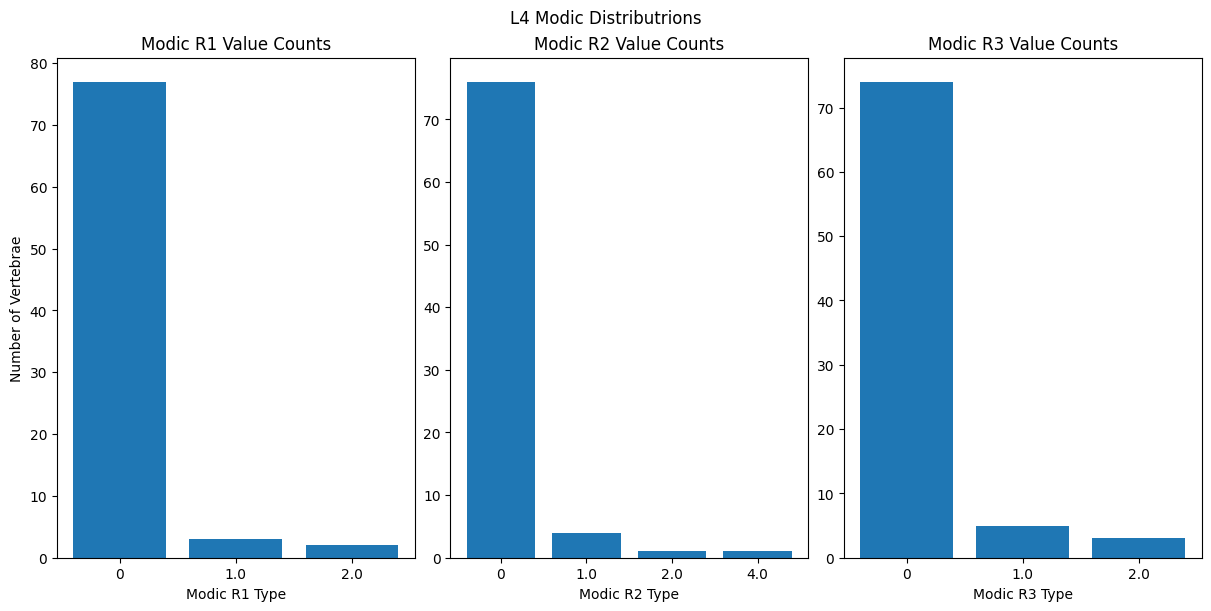

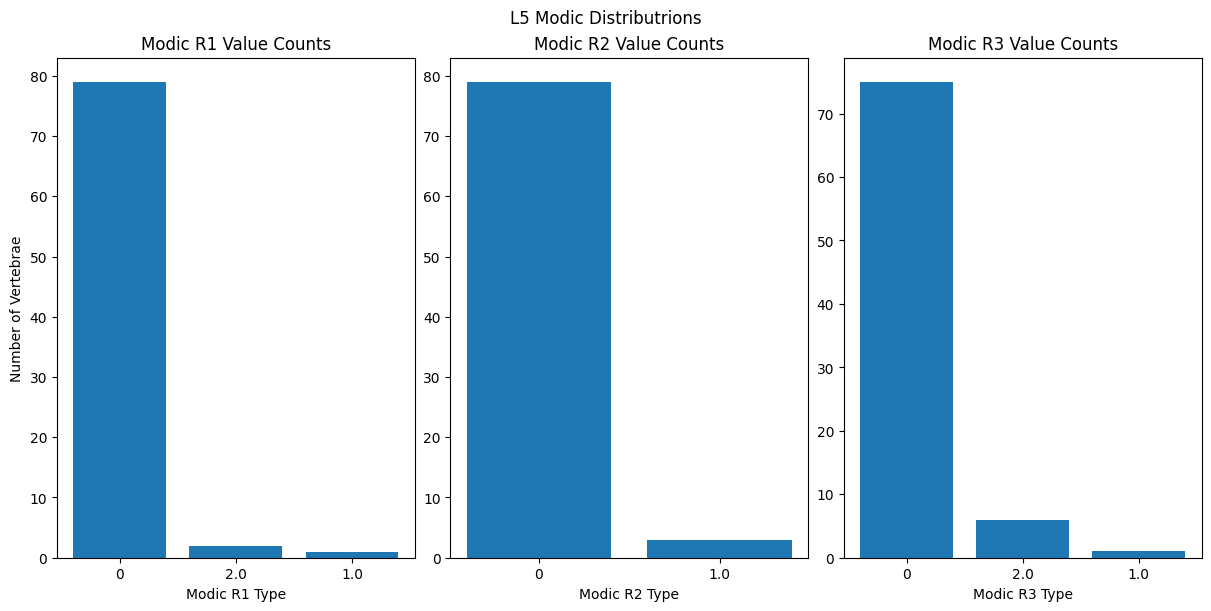

In [14]:
groups = modic_data.groupby('vertebra')
for name, group in groups: 
    modic_df = group.apply(pd.to_numeric, errors='coerce').fillna('0')
    modic_r1_val_counts = modic_df["Modic R1 "].value_counts()
    modic_r2_val_counts = modic_df['Modic R2 '].value_counts()
    modic_r3_val_counts = modic_df["Modic R3"].value_counts()

    fig, ax = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(12,6))
    fig.suptitle(f'{name} Modic Distributrions')
    ax[0].bar(modic_r1_val_counts.index.astype('str'), modic_r1_val_counts)
    ax[0].set_title('Modic R1 Value Counts')
    ax[0].set_xlabel('Modic R1 Type')
    ax[0].set_ylabel('Number of Vertebrae')

    ax[1].bar(modic_r2_val_counts.index.astype('str'), modic_r2_val_counts)
    ax[1].set_title('Modic R2 Value Counts')
    ax[1].set_xlabel('Modic R2 Type')

    ax[2].bar(modic_r3_val_counts.index.astype('str'), modic_r3_val_counts)
    ax[2].set_title('Modic R3 Value Counts')
    ax[2].set_xlabel('Modic R3 Type')

    plt.show()